<a href="https://colab.research.google.com/github/abbab23/colab/blob/main/cali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cali=fetch_california_housing()

In [3]:
df=pd.DataFrame(data=cali.data,columns=cali.feature_names)
df['target']=cali.target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df.shape

(20640, 9)

In [7]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

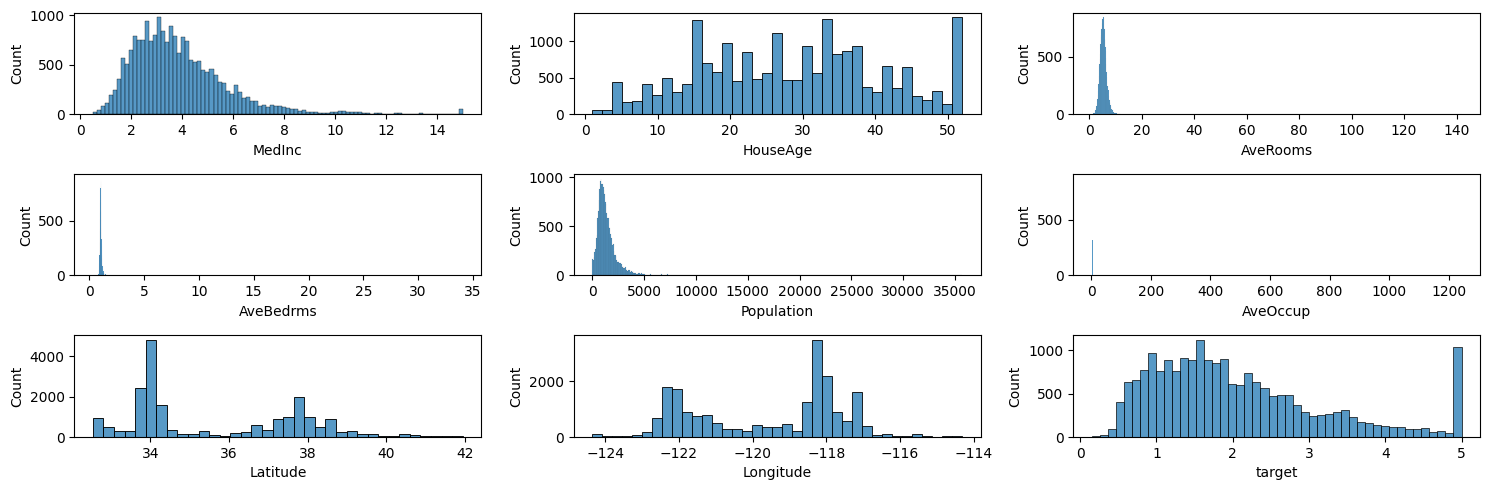

In [15]:
fig,axes=plt.subplots(nrows=3, ncols=3,figsize=(15,5))
axes=axes.flatten()
for i,col in enumerate(df.columns):
    sns.histplot(data=df,x=col,ax=axes[i])
fig.tight_layout()
plt.show()

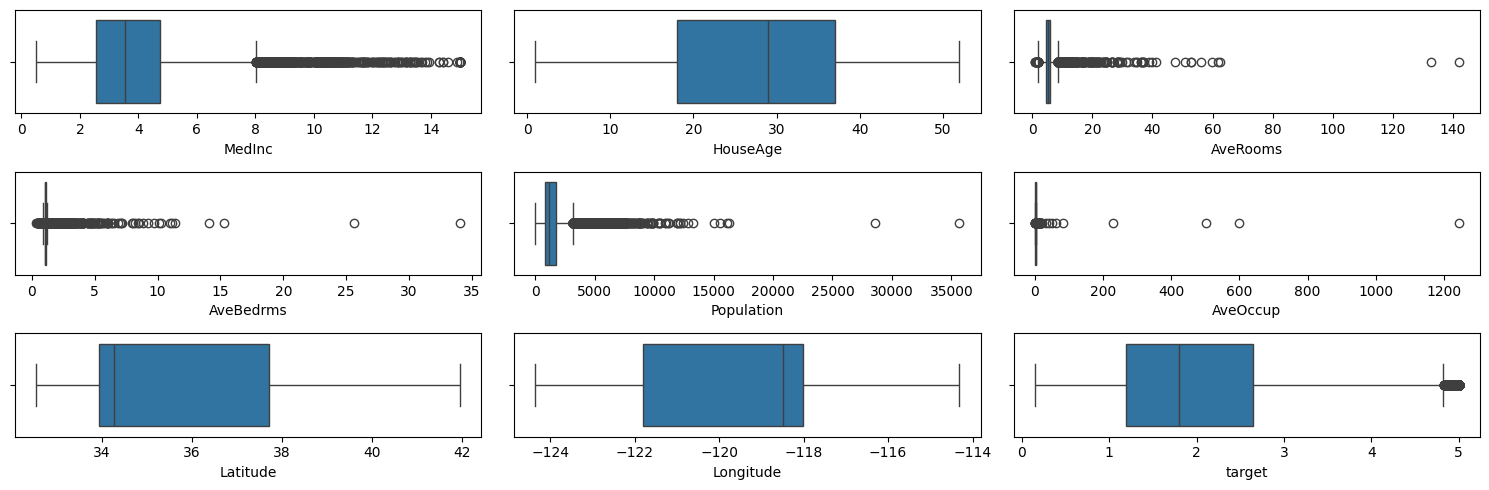

In [16]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,5))
axes=axes.flatten()
for i,col in enumerate(df.columns):
  sns.boxplot(data=df,x=col,ax=axes[i])
fig.tight_layout()
plt.show()

In [19]:
from scipy.stats import zscore
zscore=df.apply(zscore,axis=0)
threshhold=3
outliers=(np.abs(zscore)>threshhold).sum(axis=0)
outlier_summary=pd.DataFrame({"column": df.columns,"outliers":outliers})
print(outlier_summary)


                column  outliers
MedInc          MedInc       345
HouseAge      HouseAge         0
AveRooms      AveRooms       133
AveBedrms    AveBedrms       145
Population  Population       342
AveOccup      AveOccup         8
Latitude      Latitude         0
Longitude    Longitude         0
target          target         0


In [21]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [22]:
df.duplicated().sum()

0

In [23]:

from scipy.stats import zscore
zscore=df.apply(zscore,axis=0)
threshhold=3
outliers=(np.abs(zscore)>threshhold)
filtered_df = df[~outliers.any(axis=1)]

In [24]:
filtered_df.shape

(19794, 9)

In [27]:
df=filtered_df


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor